In [1]:
import geopandas
import shapely
from shapely import Point, LineString, Polygon, MultiPolygon

In [2]:
a = [Point(1,1), Point(5,8), Point(7,20), Point(2,6), Point(1,1)]
a = Polygon(a)
print(a)

POLYGON ((1 1, 5 8, 7 20, 2 6, 1 1))


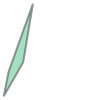

In [3]:
a

In [4]:
xx,yy = a.exterior.coords.xy
coords = a.exterior.coords.xy

In [5]:
x_coords = xx.tolist()
y_coords = yy.tolist()

In [6]:
x_coords 

[1.0, 5.0, 7.0, 2.0, 1.0]

In [7]:
y_coords

[1.0, 8.0, 20.0, 6.0, 1.0]

In [8]:
for i in range(0, len(x_coords)-1):
    coords_start = (x_coords[i], y_coords[i])
    coords_end = (x_coords[-1], y_coords[-1])
    
    if coords_start == coords_end:
        print("It ends with same coordinates")

It ends with same coordinates


In [9]:
def great_circle_dist(phi1,phi2,lam1,lam2):
    phi1 = math.radians(phi1) 
    phi2 = math.radians(phi2)
    lam1 = math.radians(lam1)
    lam2 = math.radians(lam2)
    dl = abs(lam1-lam2) 
    d = math.acos((math.sin(phi1)*math.sin(phi2))+(math.cos(phi1)*math.cos(phi2)*math.cos(dl)))
    spheric_dist = round(d*6300)
    return spheric_dist

In [10]:
import math

for i in range(0, len(x_coords)-1):
    phi1 = x_coords[i] 
    phi2 = x_coords[i+1]
    lam1 = y_coords[i]
    lam2 = y_coords[i+1]
    
    spheric_dist = great_circle_dist(phi1,phi2,lam1,lam2)
    
    print(f"Distance between Point{i} and Point{i+1}: {spheric_dist} Kms")

Distance between Point0 and Point1: 885 Kms
Distance between Point1 and Point2: 1330 Kms
Distance between Point2 and Point3: 1630 Kms
Distance between Point3 and Point4: 560 Kms


In [11]:
import math

def calculate_angle(x1,x2,y1,y2):
    x1 = math.radians(x1) 
    x2 = math.radians(x2)
    y1 = math.radians(y1)
    y2 = math.radians(y2)
    angle = math.atan2(y2 - y1, x2 - x1) * 180 / math.pi
    return angle

In [63]:
for i in range(0, len(x_coords)-1):
    x1 = x_coords[i] 
    x2 = x_coords[i+1]
    y1 = y_coords[i]
    y2 = y_coords[i+1]
    
    angle = calculate_angle(x1,x2,y1,y2)
    
    print(f"Distance between Point{i} and Point{i+1}: {angle} degrees")

Distance between Point0 and Point1: 60.25511870305779 degrees
Distance between Point1 and Point2: 80.53767779197437 degrees
Distance between Point2 and Point3: -109.65382405805333 degrees
Distance between Point3 and Point4: -101.30993247402021 degrees


In [12]:
from shapely import Polygon
ob = MultiPolygon([
    (
    ((0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0)),
    [((0.1,0.1), (0.1,0.2), (0.2,0.2), (0.2,0.1))]
    )
])

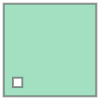

In [13]:
ob

In [94]:
import os
import geopandas as gpd
import pandas as pd

In [95]:
idaho_df = pd.read_csv(r"Vertices_Labels\Idaho_vertices_labels.csv")
idaho_df = idaho_df.drop(columns = ["Unnamed: 0"])
idaho_df.head(2)

Longitude   Latitude case
0 -116.049086  49.000846  yes
1 -116.049087  49.000671   no

In [96]:
def great_circle_dist(phi1,phi2,lam1,lam2):
    phi1 = math.radians(phi1) 
    phi2 = math.radians(phi2)
    lam1 = math.radians(lam1)
    lam2 = math.radians(lam2)
    dl = abs(lam1-lam2) 
    d = math.acos((math.sin(phi1)*math.sin(phi2))+(math.cos(phi1)*math.cos(phi2)*math.cos(dl)))
    spheric_dist = d*6300*1000
    return spheric_dist

In [97]:
list_sphericDist = []
for i in range(len(idaho_df)-1):
    
    phi1 = idaho_df.loc[i, "Longitude"] 
    phi2 = idaho_df.loc[i+1, "Longitude"] 
    lam1 = idaho_df.loc[i, "Latitude"]
    lam2 = idaho_df.loc[i+1, "Latitude"]
    
    spheric_dist = great_circle_dist(phi1,phi2,lam1,lam2)
    
    list_sphericDist.append(spheric_dist)
    print(f"Distance between Point{i} and Point{i+1}: {spheric_dist} metres")
    

Distance between Point0 and Point1: 8.451044301992031 metres
Distance between Point1 and Point2: 25.30180878494376 metres
Distance between Point2 and Point3: 8.40188862455943 metres
Distance between Point3 and Point4: 1.8396121715943905 metres
Distance between Point4 and Point5: 5.5052462543127625 metres
Distance between Point5 and Point6: 1.8324120963281718 metres
Distance between Point6 and Point7: 110.28678899505644 metres
Distance between Point7 and Point8: 330.7161657314808 metres
Distance between Point8 and Point9: 110.23919268095864 metres
Distance between Point9 and Point10: 31.53146041550154 metres
Distance between Point10 and Point11: 94.64239597236413 metres
Distance between Point11 and Point12: 31.48335021892093 metres
Distance between Point12 and Point13: 43.554218408050914 metres
Distance between Point13 and Point14: 130.42123772500707 metres
Distance between Point14 and Point15: 43.506337648800155 metres
Distance between Point15 and Point16: 75.47117299580799 metres
Dist

Distance between Point7198 and Point7199: 26.06139787263202 metres
Distance between Point7199 and Point7200: 30.241612252715665 metres
Distance between Point7200 and Point7201: 25.693245423199677 metres
Distance between Point7201 and Point7202: 25.19027694376836 metres
Distance between Point7202 and Point7203: 16.11220279892702 metres
Distance between Point7203 and Point7204: 9.42427258856515 metres
Distance between Point7204 and Point7205: 49.73336303637708 metres
Distance between Point7205 and Point7206: 27.272450794413402 metres
Distance between Point7206 and Point7207: 51.29353776322919 metres
Distance between Point7207 and Point7208: 62.30823499822498 metres
Distance between Point7208 and Point7209: 40.733019950223 metres
Distance between Point7209 and Point7210: 1.1382019611267387 metres
Distance between Point7210 and Point7211: 13.956182003536478 metres
Distance between Point7211 and Point7212: 44.63942855984467 metres
Distance between Point7212 and Point7213: 53.7370351245792 m

Distance between Point14692 and Point14693: 76.69512392274888 metres
Distance between Point14693 and Point14694: 14.296501144298913 metres
Distance between Point14694 and Point14695: 56.19637564308244 metres
Distance between Point14695 and Point14696: 143.08559810655805 metres
Distance between Point14696 and Point14697: 16.060979338591345 metres
Distance between Point14697 and Point14698: 68.50066317867382 metres
Distance between Point14698 and Point14699: 98.04828353178539 metres
Distance between Point14699 and Point14700: 23.9839547107366 metres
Distance between Point14700 and Point14701: 90.17906920081981 metres
Distance between Point14701 and Point14702: 70.00031764377985 metres
Distance between Point14702 and Point14703: 22.368425163096987 metres
Distance between Point14703 and Point14704: 22.640982116317417 metres
Distance between Point14704 and Point14705: 70.57482800133216 metres
Distance between Point14705 and Point14706: 81.7292479913552 metres
Distance between Point14706 and

Distance between Point21515 and Point21516: 51.56522938851076 metres
Distance between Point21516 and Point21517: 287.56030025143326 metres
Distance between Point21517 and Point21518: 2.411751903462136 metres
Distance between Point21518 and Point21519: 4.030169665279868 metres
Distance between Point21519 and Point21520: 167.73777440617036 metres
Distance between Point21520 and Point21521: 14.468684220639732 metres
Distance between Point21521 and Point21522: 21.81855036679521 metres
Distance between Point21522 and Point21523: 13.353697531995161 metres
Distance between Point21523 and Point21524: 2.3525587839690734 metres
Distance between Point21524 and Point21525: 1.8491686627660895 metres
Distance between Point21525 and Point21526: 180.41205134591019 metres
Distance between Point21526 and Point21527: 34.66616109890081 metres
Distance between Point21527 and Point21528: 22.293836570617493 metres
Distance between Point21528 and Point21529: 41.189788801768785 metres
Distance between Point215

Distance between Point29148 and Point29149: 5.542738040715082 metres
Distance between Point29149 and Point29150: 7.994467842166706 metres
Distance between Point29150 and Point29151: 11.748550067423192 metres
Distance between Point29151 and Point29152: 11.950475335206418 metres
Distance between Point29152 and Point29153: 7.912471132633282 metres
Distance between Point29153 and Point29154: 5.604404974375885 metres
Distance between Point29154 and Point29155: 12.110173702241855 metres
Distance between Point29155 and Point29156: 3.7656390087852127 metres
Distance between Point29156 and Point29157: 4.529519672121703 metres
Distance between Point29157 and Point29158: 18.4985958898661 metres
Distance between Point29158 and Point29159: 37.90784134515402 metres
Distance between Point29159 and Point29160: 12.121448286402252 metres
Distance between Point29160 and Point29161: 12.811416302702426 metres
Distance between Point29161 and Point29162: 44.044871439118474 metres
Distance between Point29162 

In [98]:
import math

def calculate_angle(x1,x2,y1,y2):
    x1 = math.radians(x1) 
    x2 = math.radians(x2)
    y1 = math.radians(y1)
    y2 = math.radians(y2)
    angle = math.atan2(y2 - y1, x2 - x1) * 180 / math.pi
    return angle

In [99]:
list_angle = []
for i in range(len(idaho_df)-1):
    
    x1 = idaho_df.loc[i, "Longitude"] 
    x2 = idaho_df.loc[i+1, "Longitude"] 
    y1 = idaho_df.loc[i, "Latitude"]
    y2 = idaho_df.loc[i+1, "Latitude"]
    
    angle = calculate_angle(x1,x2,y1,y2)
    
    list_angle.append(angle)
    
    print(f"Distance between Point{i} and Point{i+1}: {angle} degrees")

Distance between Point0 and Point1: -90.32717918024677 degrees
Distance between Point1 and Point2: -90.00007374434422 degrees
Distance between Point2 and Point3: -89.99998197790045 degrees
Distance between Point3 and Point4: -88.49322601131158 degrees
Distance between Point4 and Point5: -90.50252153804612 degrees
Distance between Point5 and Point6: -89.99973347784241 degrees
Distance between Point6 and Point7: -90.12544060004554 degrees
Distance between Point7 and Point8: -90.13384338143379 degrees
Distance between Point8 and Point9: -90.15059013472417 degrees
Distance between Point9 and Point10: -90.17542314657075 degrees
Distance between Point10 and Point11: -90.14618225969153 degrees
Distance between Point11 and Point12: -90.17573745664177 degrees
Distance between Point12 and Point13: -90.06348491759181 degrees
Distance between Point13 and Point14: -90.06364750403716 degrees
Distance between Point14 and Point15: -90.12716482409637 degrees
Distance between Point15 and Point16: -90.00

Distance between Point6737 and Point6738: -16.34355661785796 degrees
Distance between Point6738 and Point6739: -0.8967925892403378 degrees
Distance between Point6739 and Point6740: 15.578584553692739 degrees
Distance between Point6740 and Point6741: 24.083902993776817 degrees
Distance between Point6741 and Point6742: 33.68934252675974 degrees
Distance between Point6742 and Point6743: 41.26758542264434 degrees
Distance between Point6743 and Point6744: 54.38974957456288 degrees
Distance between Point6744 and Point6745: 54.33782917262456 degrees
Distance between Point6745 and Point6746: 45.458449882369706 degrees
Distance between Point6746 and Point6747: 45.556268681245584 degrees
Distance between Point6747 and Point6748: 37.91488869694309 degrees
Distance between Point6748 and Point6749: 37.990048181032236 degrees
Distance between Point6749 and Point6750: 33.78673685364096 degrees
Distance between Point6750 and Point6751: 49.536293987179214 degrees
Distance between Point6751 and Point675

Distance between Point13649 and Point13650: -32.94112927561902 degrees
Distance between Point13650 and Point13651: -32.88867796225683 degrees
Distance between Point13651 and Point13652: -39.055513229209986 degrees
Distance between Point13652 and Point13653: -39.06543434393516 degrees
Distance between Point13653 and Point13654: -59.33543191937199 degrees
Distance between Point13654 and Point13655: -69.01332131062634 degrees
Distance between Point13655 and Point13656: -134.99997396955558 degrees
Distance between Point13656 and Point13657: -135.00010399461055 degrees
Distance between Point13657 and Point13658: -134.9992227176711 degrees
Distance between Point13658 and Point13659: -119.67309742797761 degrees
Distance between Point13659 and Point13660: -95.77032978339034 degrees
Distance between Point13660 and Point13661: -43.702224500033125 degrees
Distance between Point13661 and Point13662: -52.967881009434315 degrees
Distance between Point13662 and Point13663: -32.706702597944364 degrees

Distance between Point21358 and Point21359: 4.358487144992069 degrees
Distance between Point21359 and Point21360: -14.491629767971574 degrees
Distance between Point21360 and Point21361: -16.243340036081936 degrees
Distance between Point21361 and Point21362: -32.94936082155822 degrees
Distance between Point21362 and Point21363: -15.31901652130775 degrees
Distance between Point21363 and Point21364: -0.7848311591313549 degrees
Distance between Point21364 and Point21365: -13.322593124616656 degrees
Distance between Point21365 and Point21366: 25.723840190494528 degrees
Distance between Point21366 and Point21367: -51.4304886982393 degrees
Distance between Point21367 and Point21368: -90.09118826381834 degrees
Distance between Point21368 and Point21369: -90.08815345203298 degrees
Distance between Point21369 and Point21370: -90.07803888151247 degrees
Distance between Point21370 and Point21371: -90.50007841381266 degrees
Distance between Point21371 and Point21372: -90.51442506344578 degrees
Dist

Distance between Point28754 and Point28755: 94.89941286539343 degrees
Distance between Point28755 and Point28756: 94.95736722033656 degrees
Distance between Point28756 and Point28757: 97.31543725329897 degrees
Distance between Point28757 and Point28758: 97.6031577092507 degrees
Distance between Point28758 and Point28759: 95.87534127270466 degrees
Distance between Point28759 and Point28760: 93.28139228231393 degrees
Distance between Point28760 and Point28761: 98.86828707176093 degrees
Distance between Point28761 and Point28762: 94.08249205833529 degrees
Distance between Point28762 and Point28763: 93.90165331176884 degrees
Distance between Point28763 and Point28764: 97.58891373748048 degrees
Distance between Point28764 and Point28765: 94.01428531599086 degrees
Distance between Point28765 and Point28766: 95.33238920233694 degrees
Distance between Point28766 and Point28767: 88.80649153880155 degrees
Distance between Point28767 and Point28768: 89.01208932304814 degrees
Distance between Poin

In [100]:
len(list_sphericDist)

35241

In [101]:
len(idaho_df)

35242

In [104]:
idaho_calc_df = pd.DataFrame({"len_forward" : list_sphericDist, "angle_forward" : list_angle})
idaho_calc_df

len_forward  angle_forward
0         8.451044     -90.327179
1        25.301809     -90.000074
2         8.401889     -89.999982
3         1.839612     -88.493226
4         5.505246     -90.502522
...            ...            ...
35236   762.327445       0.429728
35237   254.109142       0.446264
35238     7.507838     -11.633847
35239    21.742886     -11.197950
35240     7.390715     -10.153858

[35241 rows x 2 columns]

In [106]:
idaho_nn_df = pd.concat([idaho_df, idaho_calc_df], axis = 1)
idaho_nn_df.head(1)

Longitude   Latitude case  len_forward  angle_forward
0 -116.049086  49.000846  yes     8.451044     -90.327179

In [107]:
idaho_nn_df.fillna(0)

Longitude   Latitude case  len_forward  angle_forward
0     -116.049086  49.000846  yes     8.451044     -90.327179
1     -116.049087  49.000671   no    25.301809     -90.000074
2     -116.049087  49.000147   no     8.401889     -89.999982
3     -116.049087  48.999973   no     1.839612     -88.493226
4     -116.049086  48.999935   no     5.505246     -90.502522
...           ...        ...  ...          ...            ...
35237 -116.051729  49.000893   no   254.109142       0.446264
35238 -116.049418  49.000911   no     7.507838     -11.633847
35239 -116.049350  49.000897   no    21.742886     -11.197950
35240 -116.049153  49.000858   no     7.390715     -10.153858
35241 -116.049086  49.000846  yes     0.000000       0.000000

[35242 rows x 5 columns]